## Sea Otter Object Detection from Images

### [YOLOv5](https://github.com/ultralytics/yolov5)


In [ ]:
# Flush mounted drive to colab
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
# Mount Google drive to colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# cd to yolov5 folder
%cd /content/drive/MyDrive/SeaOtterDrone2021/yolov5-master

In [ ]:
# Install dependencies of yolov5
%pip install -qr requirements.txt  

In [5]:
# Required imports
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches, text, patheffects
import torch
import cv2
from IPython.display import Image, clear_output  

In [6]:
# 
clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu111 (Tesla K80)


### Display sample images

In [ ]:
# Function that plots an image from the dataset with its corresponding bounding boxes.
def plot_sample_image(img_path, lab_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

  fig, ax = plt.subplots()
  ax.xaxis.tick_top()
  ax.imshow(img)

  f = open(lab_path, 'r')
  for line in f:
    line = line.rstrip()
    data = line.split(' ')
    box = list(map(float,data[1:]))
    x = (box[0]-box[2]*0.5)*img.shape[1]
    y = (box[1]-box[3]*0.5)*img.shape[0]
    w = box[2] * img.shape[1]
    h = box[3] * img.shape[0]

    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=1))

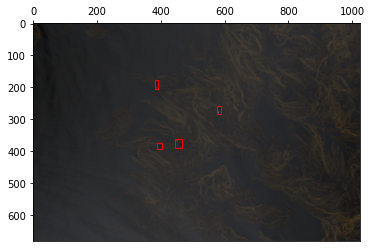

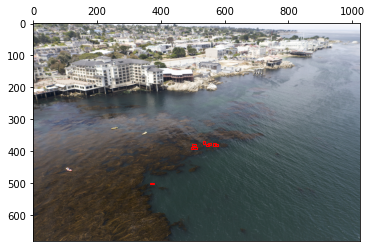

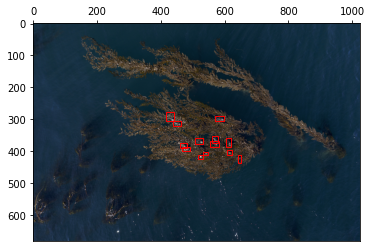

In [ ]:
# Plot sample images
img_path = '/content/drive/MyDrive/SeaOtterDrone2021/sea_otter_dataset/dataset_otters/images/train/'
lab_path = '/content/drive/MyDrive/SeaOtterDrone2021/sea_otter_dataset/dataset_otters/labels/train/'
plot_sample_image(img_path+'050821_0813_OCHF_OP_0669.jpeg',lab_path+'050821_0813_OCHF_OP_0669.txt')
plot_sample_image(img_path+'210721_1208_PCCL_BW_0759.jpeg',lab_path+'210721_1208_PCCL_BW_0759.txt')
plot_sample_image(img_path+'240921_0943_CLCL_FS_0810.jpeg',lab_path+'240921_0943_CLCL_FS_0810.txt')



### Transfer learning

In [ ]:
# Use yolov5s weights
!python train.py --img 1024 --rect --batch 16 --epochs 150 --data otters_1.yaml --weights yolov5s.pt --cache --single-cls

### Test set performance

In [ ]:
# Get test performance metrics
!python val.py --weights runs/train/exp16/weights/best.pt --img 1024 --data otters_1.yaml

In [ ]:
# Get test predicted bounding boxes
!python detect.py --weights runs/train/exp16/weights/best.pt --img 1024 --source ../sea_otter_dataset/dataset_otters/images/validation/